# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# sklearn
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# utils
import pickle

# Data Loading

In [2]:
daun_singkong_lbp_df = pd.read_csv('../dataset/Fitur_LBPuniform_Cassava Leaf.csv', header=None, na_values=np.nan)

In [3]:
daun_singkong_lbp_df

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,7510,4161,2677,1822,1368,1280,1131,1200,1185,1263,...,1089,1168,1199,1503,1865,2669,4031,7955,62542,0
1,8469,5017,2558,1515,1101,865,823,844,875,974,...,928,996,1055,1420,1865,2813,4468,8169,66064,3
2,6230,3957,2664,1727,1357,1316,1244,1365,1570,1758,...,1787,1828,1932,2048,2399,2810,3265,7066,54478,1
3,8127,4380,2420,1651,1420,1159,1039,1070,1088,1098,...,1367,1497,1763,2042,2383,2972,3819,8011,61059,1
4,6739,3367,2833,2257,2033,1823,1738,1839,1858,2040,...,1729,1794,2015,2209,2634,2863,3209,6807,51643,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21392,7229,3882,2999,2289,1689,1445,1372,1356,1382,1488,...,1789,1836,2041,2345,2629,2982,3119,7337,53852,3
21393,7245,3636,2824,2248,1862,1648,1521,1589,1579,1695,...,1730,1699,1882,2048,2415,2793,3235,7316,54296,3
21394,6787,4071,2675,1846,1427,1317,1256,1252,1242,1463,...,1761,1836,1994,2185,2527,2935,3522,7161,57016,1
21395,6606,3624,2922,2223,1828,1458,1273,1236,1342,1539,...,1792,1673,1918,2137,2612,2832,3135,6931,52518,4


**Dataset Description** <br>
***
- Index 0 - Index 25 as features
- Index 26 as label

## Features Splitting into X (as features) and Y (as target)
***

In [4]:
X, y = daun_singkong_lbp_df.drop([26],axis=1), daun_singkong_lbp_df[26]

# Data Understanding

## Check label proportion

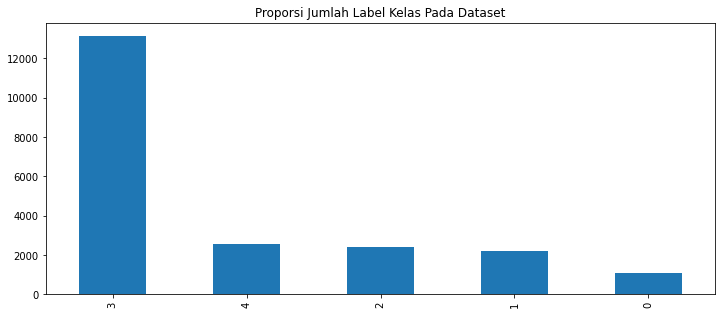

In [5]:
plt.figure(figsize=(12,5))
daun_singkong_lbp_df[26].value_counts().plot(kind='bar')
plt.title('Proporsi Jumlah Label Kelas Pada Dataset')
plt.show()

**Analysis** <br>
***
- Dataset didominasi oleh kelas berlabel **3**
- Adanya imbalanced dataset

## Check number of missing values (if any)

In [6]:
daun_singkong_lbp_df.isnull().sum().sum()

0

## Check duplicate value

In [7]:
daun_singkong_lbp_df.duplicated().sum()

0

## Data Visualization using Principal Component Analysis and Scatter Plot
***

### calculate PCA before visualization

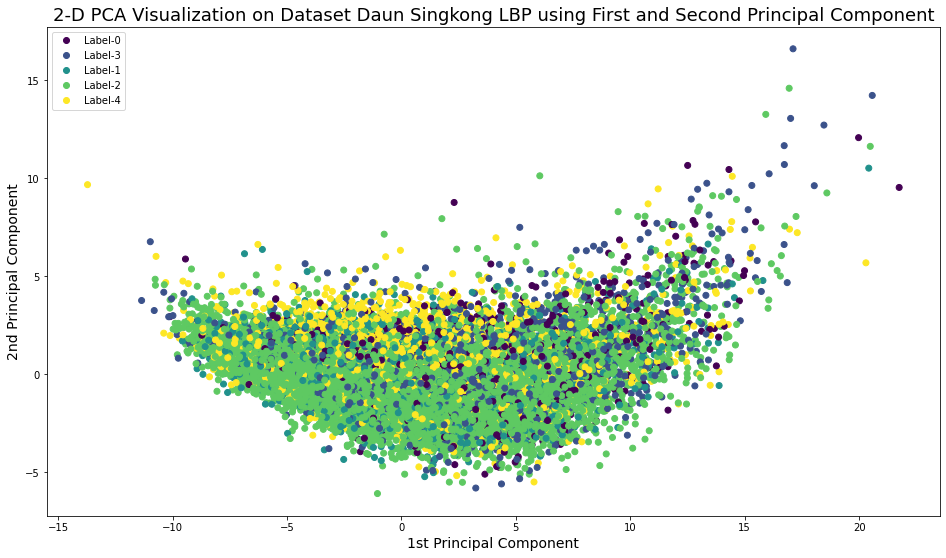

In [8]:
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
plt.figure(figsize=(16,9))
Xt = pipe.fit_transform(X)
plt.title('2-D PCA Visualization on Dataset Daun Singkong LBP using First and Second Principal Component', size=18)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.xlabel('1st Principal Component', size=14)
plt.ylabel('2nd Principal Component', size=14)
plt.legend(handles=plot.legend_elements()[0], labels=['Label-'+str(i) for i in list(y.unique())], loc='upper left')
plt.show()

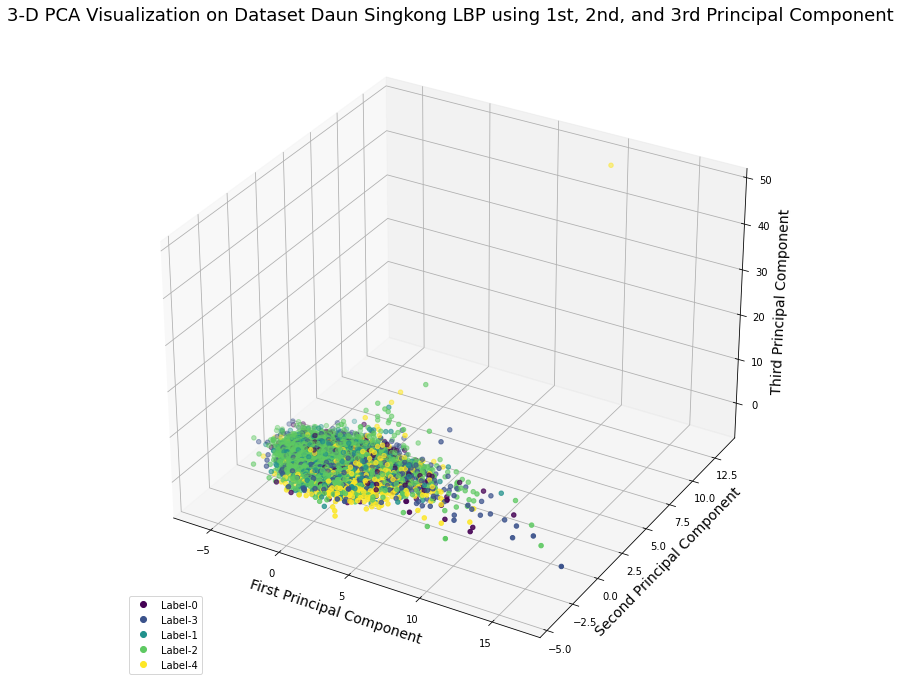

In [9]:
fig = plt.figure(figsize=(17,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Xt[:,1], Xt[:,2], Xt[:,3], c=y)
plt.title('3-D PCA Visualization on Dataset Daun Singkong LBP using 1st, 2nd, and 3rd Principal Component', size=18)
ax.set_xlabel("First Principal Component", fontsize=14)
ax.set_ylabel("Second Principal Component", fontsize=14)
ax.set_zlabel("Third Principal Component", fontsize=14)
ax.legend(handles=plot.legend_elements()[0],labels=['Label-'+str(i) for i in list(y.unique())], loc='lower left')
plt.show()
plt.show()

**Analysis** <br>
Dari gambar di atas dapat disimpulkan bahwa antar data masih ada label yang saling tumpang tindih satu sama lainnya.
*Hipotesis* <br>
Mungkin ini akan berpengaruh ke performa model klasifikasi nantinya

# Data Preprocessing

## Dataset Splitting

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## Min Max Normalization

In [11]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Convert label target from dataframe into numpy format

In [12]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

## Show Data Dimension after preprocessing
***
untuk memastikan format dimensi data yang bersesuaian <br>

In [13]:
X_train.shape, y_train.shape

((14977, 26), (14977,))

In [14]:
X_test.shape, y_test.shape

((6420, 26), (6420,))

# Save Data After Preprocessing
***
Split data menjadi training (70%) dan testing (30%) *(sesuai paper)* untuk digunakan pada tahap-tahap berikutnya. <br>
Save training and testing into pickle format

In [15]:
data_after_preprocessing = {
    'training': {
        'X': X_train,
        'y': y_train,
    },
    'testing': {
        'X': X_test,
        'y': y_test,
    }
}
# save dataset into pickle format
pickle.dump(data_after_preprocessing, open('../dataset/data_daun_singkong_after_preprocessing.pkl', 'wb'))